# Salary Predictions Based on Job Descriptions

# Table of Contents
### 1. Define 

- [Problem Definition](#DefineProblem)

### 2. Discover

- [Exploratory Data Analysis (EDA)](#Visualizations)

- [Baseline Model: Average Industry Salary](#Baseline)

### 3. Develop

- [Model 1. Linear Regression](#LinearRegression)

- [Model 2. Random Forest](#RandomForest)

- [Model 3. Gradient Boosting](#GBM)

- [Model 4. K-Nearest Neighbor](#kNN)

### 4. Deploy




# Part 1 - DEFINE

<a id='DefineProblem'></a>
### ---- 1 Define the problem ----

This project aims to predict salaries given a set of job postings.

In [1]:
#Import libraries

import numpy as np
import sklearn as sk
import scipy as sp #imports stats functions
%matplotlib inline
import matplotlib as mpl # timports matplotlib
import matplotlib.cm as cm #allows easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import seaborn as sns #sets up styles, gives more plotting options

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

# Import Linear Regression Libraries 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
#Contact Information
__author__ = "Annette Kiplagat"
__email__ = "_@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load data into a Pandas dataframe
features = pd.read_csv("data/train_features.csv")
salaries = pd.read_csv("data/train_salaries.csv")

In [3]:
# Check features dataframes
features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
features.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [6]:
#Check Salaries dataframe
salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [7]:
salaries.describe()

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


In [8]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [9]:
# Combine 'salaries' and'features' data frames by 'jobId'
postings =pd.merge(features,salaries,on='jobId')
postings.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### ---- 3 Clean the data ----

In [10]:
# Check if 'jobId' is a unique identifier.
postings['jobId'].nunique()

1000000

'jobID' has 1,000,000 unique values. This makes it a unique identifier that would not be useful in a model. 
The column will be deleted.  

In [11]:
postings.drop('jobId', axis=1, inplace = True)
#postings.info()

In [12]:
# Check for missing values
postings.isnull().sum()
# There are no missing values

companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [13]:
# make list of numerical variables
num_vars = [var for var in postings.columns if postings[var].dtypes == 'int']
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
postings[num_vars].head()

Number of numerical variables:  3


,yearsExperience,milesFromMetropolis,salary
0,10,83,130
1,3,73,101
2,10,38,137
3,8,17,142
4,8,16,163


In [14]:
# make list of categorical variables
cat_vars = [var for var in postings.columns if postings[var].dtypes == 'object']
print('Number of categorical variables: ', len(cat_vars))

# visualise the categorical variables
postings[cat_vars].head()

Number of categorical variables:  5


,companyId,jobType,degree,major,industry
0,COMP37,CFO,MASTERS,MATH,HEALTH
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB
2,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH
3,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO
4,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE


In [15]:
# Identify number of unique categories in each categorical variable
postings[cat_vars].nunique().sort_values(ascending = False)

companyId    63
major         9
jobType       8
industry      7
degree        5
dtype: int64

### ---- 4 Explore the data (EDA) ----

<a id='Visualizations'></a>
**a. Visualize Numerical Data**

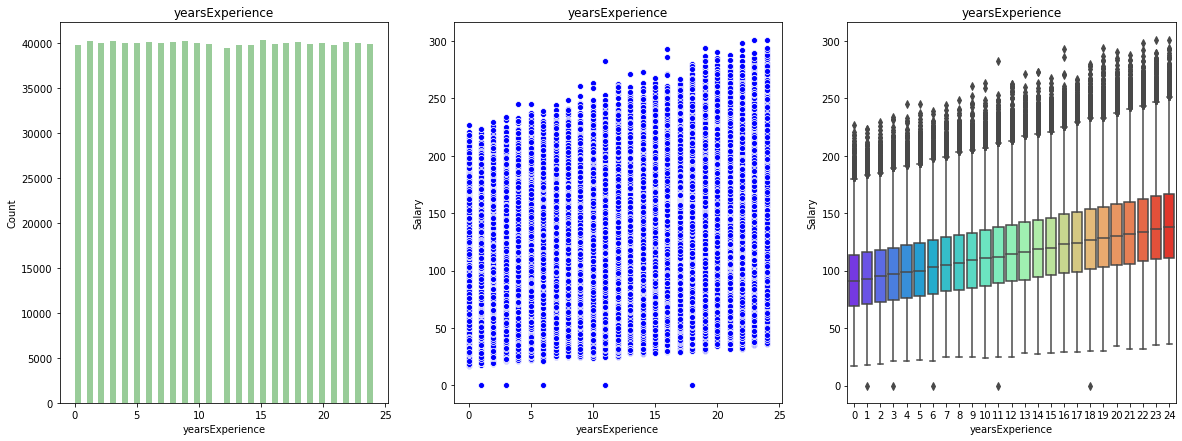

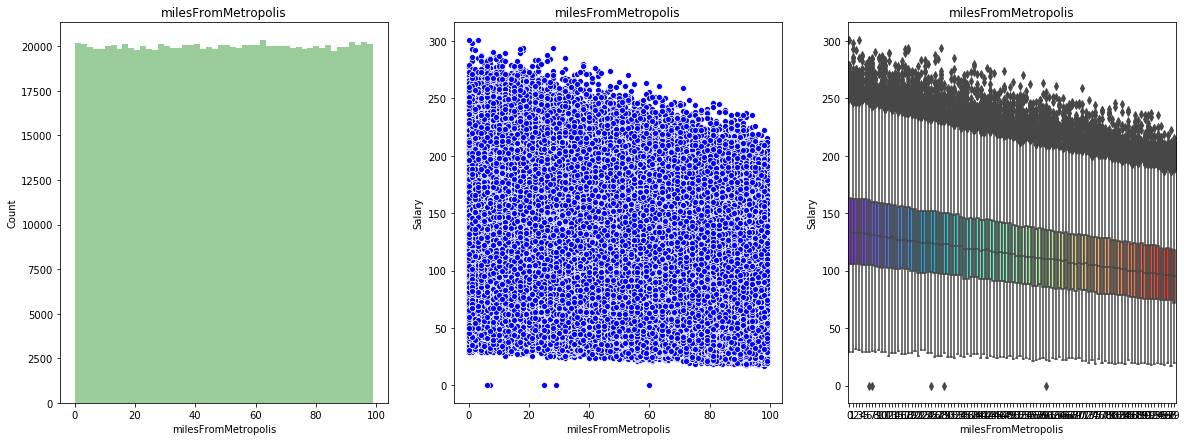

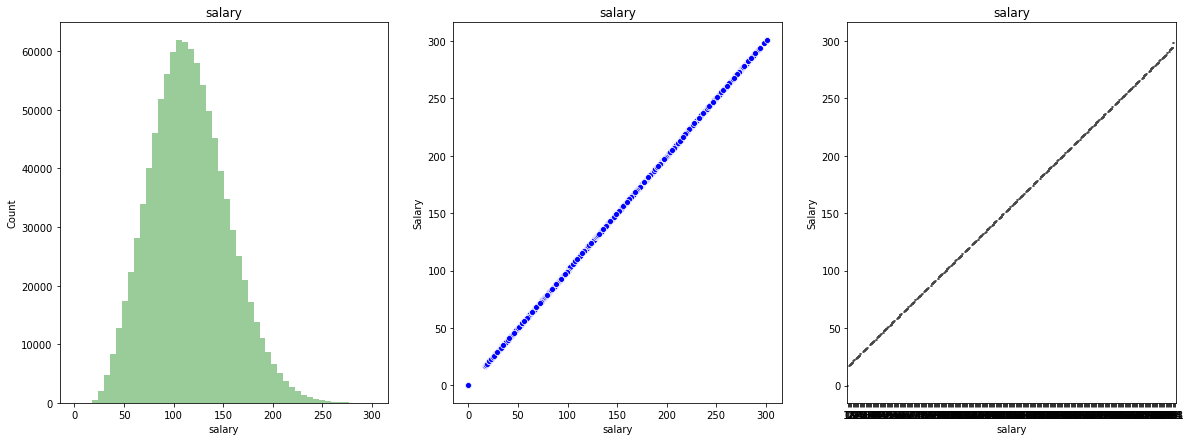

In [16]:
def plot_num_vars(df,var): 
    
    # Set up the matplotlib figure
    f, axes = plt.subplots(ncols=3, figsize=(20, 7))   
    
    # Distribution Plot
    sns.distplot(df[var], kde = False, color="g", ax=axes[0]).set_title(var)
    axes[0].set_ylabel('Count')
    
    # Scatter Plot
    sns.scatterplot(x = df[var],y = df['salary'], color="b", ax=axes[1]).set_title(var)
    axes[1].set_ylabel('Salary')
    
    # Box Plot
    sns.boxplot(x = df[var],y = df['salary'], data = df, palette='rainbow', ax=axes[2]).set_title(var)
    axes[2].set_ylabel('Salary')
    
for var in num_vars:
    plot_num_vars(postings, var)

**b. Visualize Data: Categorical Plots**

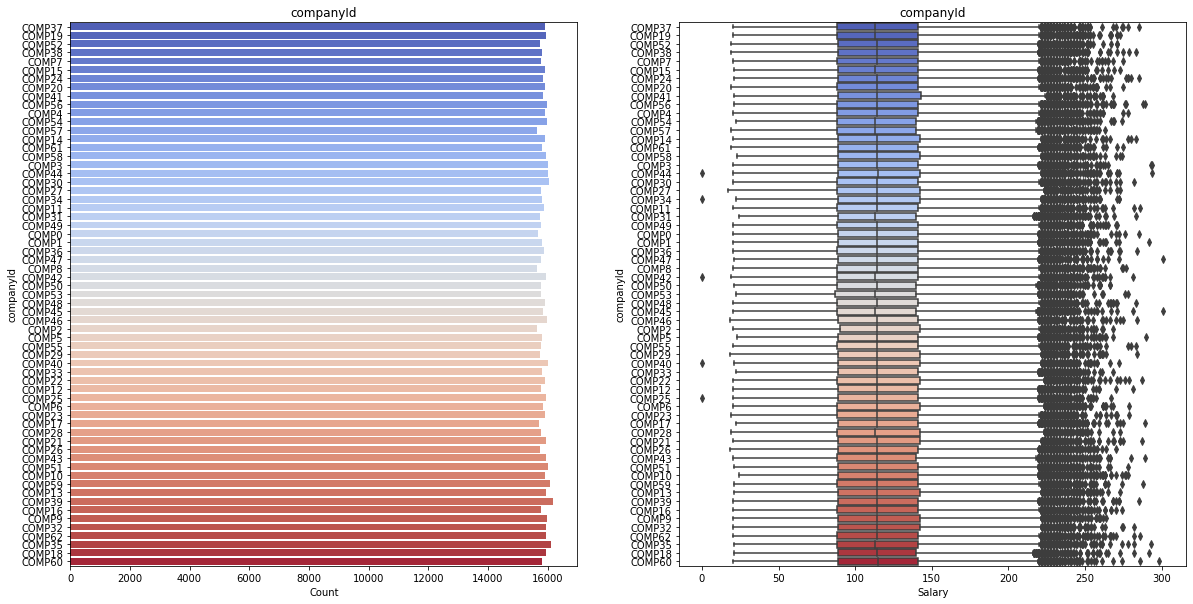

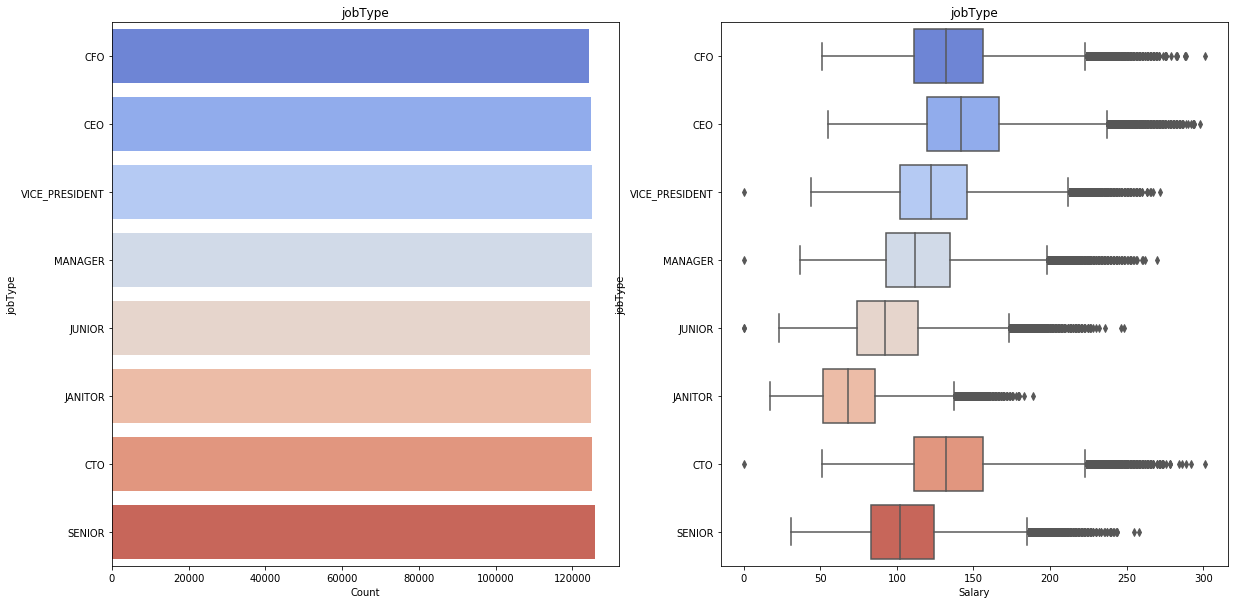

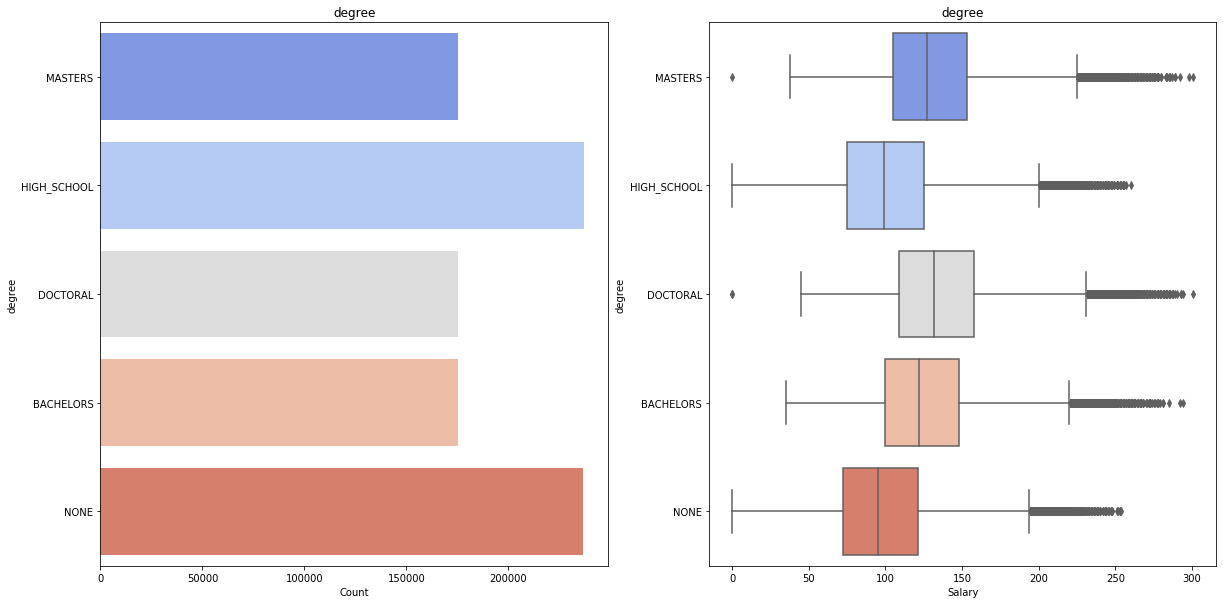

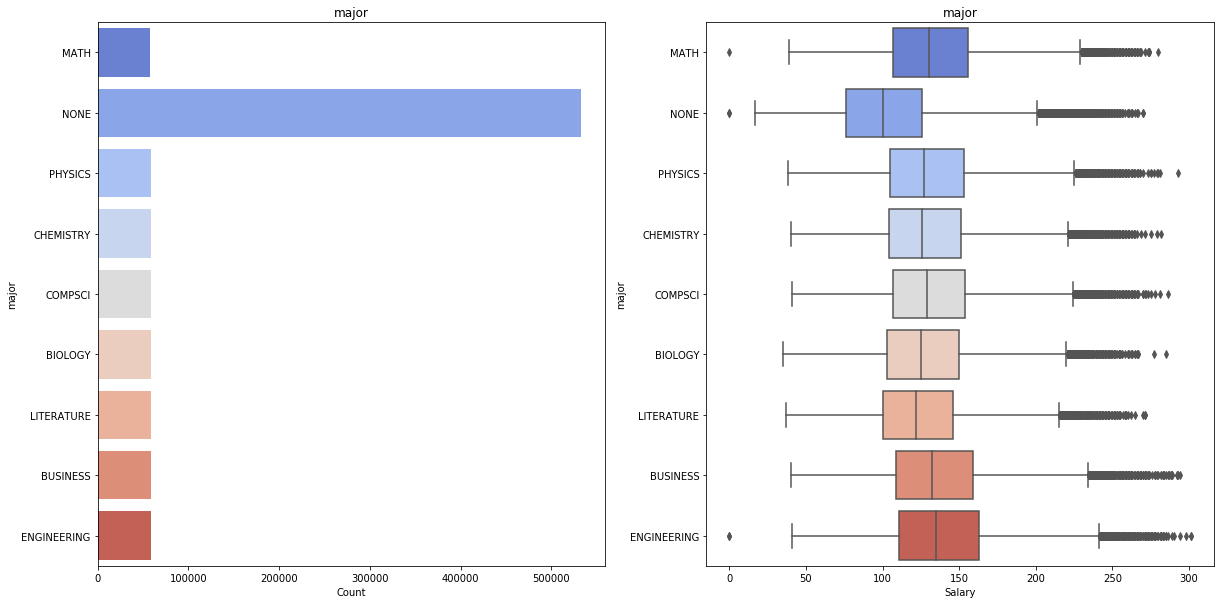

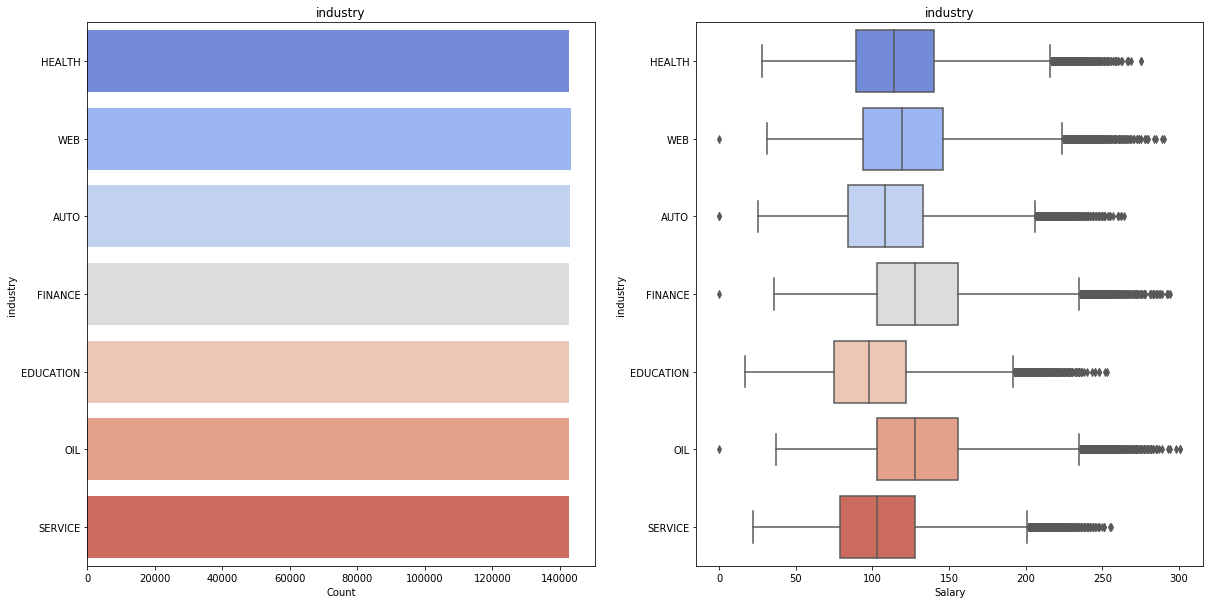

In [17]:
def plot_cat_vars(df,var): 
    
    # Set up the matplotlib figure
    f, axes = plt.subplots(ncols=2, figsize=(20, 10))   
    
    # Count Plot
    sns.countplot(y= df[var],data= df, orient='h',palette='coolwarm',ax=axes[0]).set_title(var)
    axes[0].set_ylabel(var)
    axes[0].set_xlabel('Count')
    
    # Box Plot
    sns.boxplot(y = df[var],x = df['salary'], data = df, orient='h', palette='coolwarm', ax=axes[1]).set_title(var)
    axes[1].set_ylabel(var)
    axes[1].set_xlabel('Salary')
    
for var in cat_vars:
    plot_cat_vars(postings, var)

**Remove rows with salary less than zero**

In [18]:
#Remove rows with salary <= 0 
postings.drop(postings[postings['salary']<=0].index,axis=0, inplace=True)
postings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 8 columns):
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(5)
memory usage: 68.7+ MB


**Evaluate correlations**

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


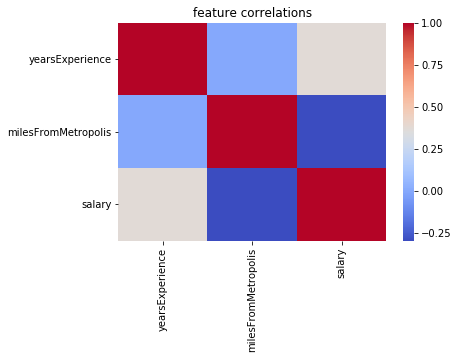

In [19]:
# Correlations Heatmap
corr = postings.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            cmap='coolwarm')
plt.title('feature correlations')
corr

<a id='Baseline'></a>
### ---- 5 Establish a baseline ----

In [20]:
# Create arrays for independent variables and target variable(salary)
jobFeatures = postings[[ 'companyId','jobType','degree','major','industry','yearsExperience','milesFromMetropolis']]
salary = postings['salary']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(jobFeatures, salary,test_size=0.3,random_state=13)
#X_train.info()

In [22]:
#Calculate salary averages by industry
#salaryAvg = postings.groupby('industry')['salary'].mean()
salaryAvg = y_train.groupby(X_train['industry']).mean()
salaryAvg

industry
AUTO         109.402652
EDUCATION     99.470584
FINANCE      130.717103
HEALTH       115.737240
OIL          130.849219
SERVICE      104.430002
WEB          121.698726
Name: salary, dtype: float64

In [23]:
# Generate predicted salaries using industry averages
baselinePredictions = np.empty(len(X_test))

for i in (0,len(X_test)-1):
#X_test.iloc[0]['industry'] == 'AUTO'
    
    if X_test.iloc[i]['industry'] == 'AUTO' : 
        baselinePredictions == salaryAvg['AUTO']

    elif X_test.iloc[i]['industry'] == 'EDUCATION': 
        baselinePredictions[i] == salaryAvg['EDUCATION']

    elif X_test.iloc[i]['industry'] == 'HEALTH': 
        baselinePredictions[i] == salaryAvg['HEALTH']

    elif X_test.iloc[i]['industry'] == 'FINANCE': 
        baselinePredictions[i] == salaryAvg['FINANCE']

    elif X_test.iloc[i]['industry'] == 'OIL': 
        baselinePredictions[i] == salaryAvg['OIL']

    elif X_test.iloc[i]['industry'] == 'SERVICE': 
        baselinePredictions[i] == salaryAvg['SERVICE']

    else: 
        baselinePredictions[i] == salaryAvg['WEB']

In [24]:
# Function to calculate performance metrics
def metrics_analysis(actual_val, predicted_val):
    print('MAE:', metrics.mean_absolute_error(actual_val, predicted_val))
    print('MSE:', metrics.mean_squared_error(actual_val, predicted_val ))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(actual_val, predicted_val)))

metrics_analysis(y_test, baselinePredictions)

MAE: 116.09923033076777
MSE: 14978.428944763149
RMSE: 122.38639199176986


### ---- 6 Hypothesize solution ----

The following models will be built to make better predictions than the baseline model: 
1. Linear Regression
2. Random Forest
3. K-Nearest Neighbor (kNN)

The following features will be added to the model:
1. Interaction variables (Pending)
2. Summary statistics for each group (Pending)
3. New categories (Pending)

## Part 3 - DEVELOP

The following sections cycle through tuning models, training/validating models to reduce mean squared error (MSE)

### ---- 7 Engineer features  ----

In [25]:
#Create Dummy variables for independent variable matrix
jobFeatures = pd.get_dummies(data = jobFeatures,drop_first = True)
jobFeatures.head()

,yearsExperience,milesFromMetropolis,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,companyId_COMP15,companyId_COMP16,companyId_COMP17,companyId_COMP18,companyId_COMP19,companyId_COMP2,companyId_COMP20,companyId_COMP21,companyId_COMP22,companyId_COMP23,companyId_COMP24,companyId_COMP25,companyId_COMP26,companyId_COMP27,companyId_COMP28,companyId_COMP29,companyId_COMP3,companyId_COMP30,companyId_COMP31,companyId_COMP32,companyId_COMP33,companyId_COMP34,companyId_COMP35,companyId_COMP36,companyId_COMP37,companyId_COMP38,companyId_COMP39,companyId_COMP4,companyId_COMP40,companyId_COMP41,companyId_COMP42,companyId_COMP43,companyId_COMP44,companyId_COMP45,companyId_COMP46,companyId_COMP47,companyId_COMP48,companyId_COMP49,companyId_COMP5,companyId_COMP50,companyId_COMP51,companyId_COMP52,companyId_COMP53,companyId_COMP54,companyId_COMP55,companyId_COMP56,companyId_COMP57,companyId_COMP58,companyId_COMP59,companyId_COMP6,companyId_COMP60,companyId_COMP61,companyId_COMP62,companyId_COMP7,companyId_COMP8,companyId_COMP9,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,3,73,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,10,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,8,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,8,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [26]:
jobFeatures.describe()

,yearsExperience,milesFromMetropolis,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,companyId_COMP15,companyId_COMP16,companyId_COMP17,companyId_COMP18,companyId_COMP19,companyId_COMP2,companyId_COMP20,companyId_COMP21,companyId_COMP22,companyId_COMP23,companyId_COMP24,companyId_COMP25,companyId_COMP26,companyId_COMP27,companyId_COMP28,companyId_COMP29,companyId_COMP3,companyId_COMP30,companyId_COMP31,companyId_COMP32,companyId_COMP33,companyId_COMP34,companyId_COMP35,companyId_COMP36,companyId_COMP37,companyId_COMP38,companyId_COMP39,companyId_COMP4,companyId_COMP40,companyId_COMP41,companyId_COMP42,companyId_COMP43,companyId_COMP44,companyId_COMP45,companyId_COMP46,companyId_COMP47,companyId_COMP48,companyId_COMP49,companyId_COMP5,companyId_COMP50,companyId_COMP51,companyId_COMP52,companyId_COMP53,companyId_COMP54,companyId_COMP55,companyId_COMP56,companyId_COMP57,companyId_COMP58,companyId_COMP59,companyId_COMP6,companyId_COMP60,companyId_COMP61,companyId_COMP62,companyId_COMP7,companyId_COMP8,companyId_COMP9,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
count,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,0.015820,0.015909,0.015872,0.015783,0.015956,0.015908,0.015901,0.015783,0.015715,0.015957,0.015958,0.015641,0.015910,0.015949,0.015907,0.015918,0.015831,0.015931,0.015750,0.015773,0.015794,0.015754,0.016028,0.016041,0.015756,0.015958,0.015801,0.015809,0.016114,0.015891,0.015905,0.015819,0.016193,0.015918,0.016007,0.015859,0.015943,0.015955,0.016004,0.015850,0.015967,0.015796,0.015930,0.015779,0.015798,0.015791,0.016005,0.015737,0.015776,0.015977,0.015767,0.015979,0.015635,0.015961,0.016066,0.015837,0.015799,0.015822,0.015943,0.015767,0.015638,0.015988,0.124370,0.125046,0.124972,0.124593,0.125121,0.125887,0.125235,0.175363,0.236976,0.175311,0.236854,0.058518,0.058875,0.058382,0.058594,0.058684,0.057800,0.532356,0.058410,0.142820,0.142867,0.142756,0.142771,0.142640,0.143206
std,7.212390,28.877721,0.124779,0.125124,0.124981,0.124635,0.125306,0.125120,0.125093,0.124635,0.124371,0.125309,0.125313,0.124082,0.125128,0.125279,0.125116,0.125159,0.124822,0.125209,0.124507,0.124597,0.124678,0.124523,0.125583,0.125634,0.124530,0.125313,0.124705,0.124736,0.125914,0.125054,0.125108,0.124775,0.126218,0.125159,0.125502,0.124930,0.125255,0.125302,0.125491,0.124895,0.125348,0.124686,0.125205,0.124620,0.124694,0.124667,0.125495,0.124457,0.124608,0.125387,0.1

### ---- 8 Create models & 9 Test Models ----

In [27]:
#Split Data
jobFeatures_train, jobFeatures_test, salary_train,salary_test = train_test_split(jobFeatures,salary,test_size=0.3,random_state=13)

#jobFeatures_train.info()

<a id='LinearRegression'></a>
# Model 1. Linear Regression

In [28]:
# Train Linear Regression Model
from sklearn.linear_model import LinearRegression

In [29]:
#Create instance of LinearRegression()
lm = LinearRegression()

In [30]:
#Train lm on training data
lm.fit(jobFeatures_train, salary_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#Make Predictions 
lmPredictions = lm.predict(jobFeatures_test)

Text(0, 0.5, 'Salary Predictions')

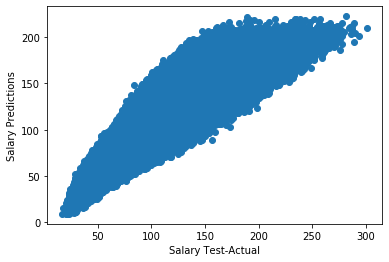

In [32]:
plt.scatter(salary_test,lmPredictions)
plt.xlabel('Salary Test-Actual')
plt.ylabel('Salary Predictions')

**Test Linear Regression model performance**

In [33]:
#Calculate Performance Metrics
metrics_analysis(salary_test, lmPredictions)

MAE: 15.843866684600329
MSE: 384.2928869559301
RMSE: 19.60338968025505


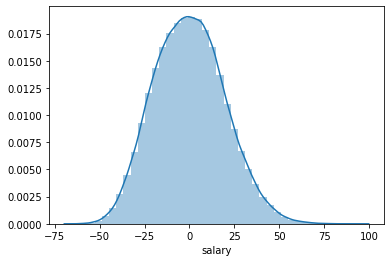

In [34]:
#Check residuals for normal distribution
sns.distplot((salary_test-lmPredictions),bins=40)

In [35]:
#View effect of Coefficients
coefficients = pd.DataFrame(lm.coef_,jobFeatures.columns)
coefficients.columns = ['Coefficient']
coefficients.sort_values('Coefficient', ascending=False )

,Coefficient
industry_OIL,21.321340
industry_FINANCE,21.162198
industry_WEB,12.119390
major_ENGINEERING,10.557386
degree_DOCTORAL,9.989897
major_BUSINESS,7.709299
industry_HEALTH,6.291824
major_MATH,5.085191
degree_MASTERS,4.942952
major_COMPSCI,3.947080


## Linear Regression with Cross-Validation 

In [36]:
from sklearn.model_selection import cross_val_predict

In [37]:
predicted = cross_val_predict(lm, jobFeatures_test, salary_test, cv=10)

In [39]:
#Calculate Performance Metrics
metrics_analysis(salary_test, predicted)

MAE: 15.846900663141282
MSE: 384.3793291616858
RMSE: 19.605594333293897


<a id='RandomForest'></a>
# Model 2. Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression

In [41]:
#Instantiate regressor
regr = RandomForestRegressor(n_estimators=100, max_depth= 13, 
                             min_samples_split = 2, 
                             min_samples_leaf = 1,
                             max_features = "auto",n_jobs = -1, #n_jobs:use all processors
                             random_state =0)

In [42]:
#Fit training data
regr.fit(jobFeatures_train, salary_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [43]:
# Predict on new data
rf_predictions = regr.predict(jobFeatures_test)

In [44]:
#Calculate Performance Metrics
metrics_analysis(salary_test, rf_predictions)

MAE: 16.150900450363295
MSE: 409.93345036223684
RMSE: 20.24681333845494


**Performance for Random Forest:**

n_estimators=100 
max_depth= None
min_samples_split = 2
min_samples_leaf = 1
max_features = "auto"
n_jobs = -1
random_state =0

**MAE: 16.14** 

**MSE: 406.349**

**RMSE: 20.15**

<a id='GBM'></a>
# Model 3. Gradient Boosting Regressor

In [158]:
from sklearn.ensemble import GradientBoostingRegressor

In [159]:
gboost = GradientBoostingRegressor(n_estimators = 100, max_depth = 10)

In [ ]:
gboost.fit(jobFeatures_train, salary_train)

In [ ]:
# Predict on new data
gb_predictions = gboost.predict(jobFeatures_test)

In [ ]:
#Calculate Performance Metrics
metrics_analysis(y_test, gb_predictions)

# Pending
### Parameters to make model better
- **max_depth:** The depth size of a tree
- **n_estimators:** The number of trees in the forest. Generally, the more trees the better accuracy, but slower computation.
- **max_features**: The max number of features that the algorithm can assign to an individual tree. Try ['auto', 'None', 'sqrt', 'log2', 0.9 and 0.2]
- **min_samples_leaf:** The minimum number of samples in newly created leaves. Try [1,2,3]. If 3 is best, try higher numbers.

### Parameters to make model faster
- **n_jobs**: Determines the amount of multiple processors should be used to train/test the model. Always use -1 to use max cores and it'll run much faster
- **random_state**: Set this to a number (42) for reproducibility. It's used to replicate your results and for others as well.
- **oob_score** Random Forest's custom validation method: out-of-bag prediction

<a id='kNN'></a>
# Model 4. KNN

**Apply Standard Scaling**

In [173]:
# Apply Standard Scaler to features dataset -> MAY BE UNNECESSARY
import sklearn.preprocessing as preproc
X_scaled = preproc.StandardScaler().fit_transform(jobFeatures)
X_scaled

array([[-0.27624796,  1.159047  , -0.12678477, ..., -0.4081042 ,
        -0.40788576, -0.40882919],
       [-1.24680052,  0.81275912, -0.12678477, ..., -0.4081042 ,
        -0.40788576,  2.4460093 ],
       [-0.27624796, -0.39924849, -0.12678477, ..., -0.4081042 ,
        -0.40788576, -0.40882919],
       ...,
       [ 0.55565425,  1.08978943, -0.12678477, ..., -0.4081042 ,
        -0.40788576, -0.40882919],
       [-0.83084942, -1.54199851, -0.12678477, ..., -0.4081042 ,
        -0.40788576, -0.40882919],
       [ 1.11025571, -1.33422578, -0.12678477, ..., -0.4081042 ,
        -0.40788576, -0.40882919]])

**Split data into a train and test set**

In [ ]:
# Apply Train/Test Split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=13)
#jobFeaturesKNN_train,jobFeaturesKNN_test,salaryKNN_train,salaryKNN_test = train_test_split(jobFeatures_scaled,salary,test_size=0.3,random_state=97) #, stratify=salary)

**Apply different values of K to evaluate which value should give the best prediction performance**

In [ ]:
# Import KNN Classifier
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Instantiate KNN Regressor with K Neighbors
knn = KNeighborsRegressor(n_neighbors=8)

In [ ]:
# Fit KNN model
knn.fit(X_train, y_train)

In [ ]:
#Make predictions on test data
knnPredictions = knn.predict(X_test)

In [ ]:
#Calculate Performance Metrics
metrics_analysis(y_test, knnPredictions)

## Principal Component Analysis

In [152]:
import warnings
warnings.filterwarnings('ignore')

**Eigen Value Decomposition of Covariance Matrix**

**Step 1:** Calculate the covariance matrix

**Step 2:** Calculate Eigen Vectors and Eigen Values from Covariance Matrix

**Step 3:** Choose Principal Components (Select Eigenvectors with Highest Eigenvalues)

**Step 4:** Project Original Matrix onto Eigenvectors

In [174]:
# 1. Calculate Covariance Matrix
features = X_scaled.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.00000100e+00  6.71875962e-04 -1.58550983e-03 ...  8.01003377e-04
   1.27691802e-04 -2.33394905e-04]
 [ 6.71875962e-04  1.00000100e+00 -6.02169011e-04 ... -5.49832606e-04
   6.85011845e-04 -9.35311879e-04]
 [-1.58550983e-03 -6.02169011e-04  1.00000100e+00 ... -2.21369125e-03
   3.99667705e-04  7.20367593e-04]
 ...
 [ 8.01003377e-04 -5.49832606e-04 -2.21369125e-03 ...  1.00000100e+00
  -1.66460060e-01 -1.66845077e-01]
 [ 1.27691802e-04  6.85011845e-04  3.99667705e-04 ... -1.66460060e-01
   1.00000100e+00 -1.66755773e-01]
 [-2.33394905e-04 -9.35311879e-04  7.20367593e-04 ... -1.66845077e-01
  -1.66755773e-01  1.00000100e+00]]


### Step 2. Calculate Eigen Vectors and Eigen Values from Covariance Matrix

**Eigen Values** - Determines the magnitude of the vector (higher number captures more variance)

**Eigin Vectors** - Determines the direction of the vector 

In [176]:
# Calculate the eigen vectors and eigen values of the covariance matrix using linalg.eig()
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

**Show the eigenvectors**

In [177]:
print("Eigenvectors \n%s" %eig_vecs)

Eigenvectors 
[[ 2.08089802e-04  1.85138127e-04 -6.05042493e-05 ...  1.02256187e-04
   4.35877971e-05  6.56653975e-05]
 [ 1.79686282e-03  1.75866366e-04  2.36968833e-04 ... -8.63517613e-04
  -2.65432708e-04 -1.51778208e-03]
 [ 1.28633999e-03  1.26779603e-01 -2.34187844e-04 ...  2.44818891e-01
   6.02749233e-02  2.19564109e-01]
 ...
 [ 8.85114294e-05  3.18090816e-04 -1.23242916e-04 ...  6.09221785e-04
   1.38546623e-03  1.54199481e-03]
 [-1.33975491e-03  1.42841646e-04 -4.61637023e-04 ... -1.21862676e-03
   9.32976393e-04  1.43558697e-03]
 [-1.29724466e-04  1.06409322e-04 -1.40544989e-04 ...  1.46666568e-03
  -6.44748509e-04  1.79584556e-04]]


**Show the eigenvalues**

In [179]:
print("Eigenvalues \n%s" %eig_vals)

Eigenvalues 
[2.76900447 0.01591829 0.06342049 0.11889008 0.16674358 0.14239752
 0.39558886 1.31088195 1.21338936 0.89984554 1.16835246 1.16666175
 1.16731391 1.16751667 1.16765574 1.14423576 1.14366712 1.14322746
 1.14218698 1.14245063 0.99645884 0.99689548 1.06230137 1.06433219
 1.06292296 1.0639258  1.06330974 1.06354728 1.01968691 1.01863685
 1.01379272 1.01404538 1.01454389 1.01480065 1.01496793 1.01519846
 1.01671235 1.01544045 1.01545889 1.01554816 1.01563593 1.01572621
 1.01575641 1.01579441 1.01582654 1.01635505 1.01587348 1.01632643
 1.01629933 1.01591844 1.01593955 1.01595929 1.01627204 1.01597552
 1.01598269 1.01625565 1.01600093 1.01624405 1.01602335 1.01602747
 1.01603983 1.0162303  1.01622273 1.01622172 1.01620697 1.01621045
 1.0160488  1.01619938 1.0160563  1.01619141 1.01619631 1.01607448
 1.01608926 1.01610756 1.01611024 1.0161719  1.01616248 1.01612716
 1.01614276 1.01612013 1.01609212 1.01618005 1.01613444 1.0161504
 1.01617035 1.01615727 1.01606037 1.01606755 1.016

The eigenvalues capture the variance of each eigenvector.
The variance of each eigenvalue can be found by dividing it by the sum of all eigenvalues

**Examine the first principal component:**

In [181]:
#First component capture 3.1% of variance
eig_vals[0] / sum(eig_vals)

0.031112378717977937

In [183]:
# Second component captures 0.017 % of variance
eig_vals[1] / sum(eig_vals)

0.00017885703195155573

### Step 3. Choose Principal Components (Eigenvectors with Highest Eigenvalues)
Find the transformation matrix V by selecting eigenvectors with highest eigenvalues (variance)

In [184]:
# Choose the first two principle components
V = eig_vecs[:, :2]

### Step 4. Project Original Matrix onto Eigenvectors

Project data points onto PC1 and PC2. The dot product maps the data points onto a new dimension. 

In [186]:
# Examine our new transformed matrix with PC1 & PC2
projected_X = X_scaled.dot(V)
projected_X

array([[ 2.0053167 ,  0.01591192],
       [-1.46547886,  0.0161098 ],
       [ 2.02675193,  0.01585533],
       ...,
       [-1.29592927,  0.01683751],
       [ 0.23512439,  0.01482005],
       [-0.54331974,  0.01509305]])

**Examine Principle Components of EVD**

In [188]:
X_pca = pd.DataFrame(data = projected_X, columns = ['PC1', 'PC2'])
X_pca.head()
#New reduced dimensionality Set

,PC1,PC2
0,2.005317,0.015912
1,-1.465479,0.016110
2,2.026752,0.015855
3,2.009703,0.014912
4,1.262079,0.015490


In [192]:
#plt.figure(figsize=(8,6))
#plt.scatter(X_pca['PC1'], X_pca['PC2'], c = salary)
#plt.xlabel('First principle component')
#plt.ylabel('Second principle component')

### ---- 10 Select best model  ----

**The Linear Regression Model shows the lowest RMSE**

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [438]:
# Script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [439]:
#save prediction to a csv file 


In [ ]:
#Save a visualization and summary of prediction and feature importances

### ---- 13 Measure efficacy ----